In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## mc2

In [3]:
mc2 = pd.read_csv("./mc2_nll_output.csv")

In [5]:
mc2.groupby(["lang_code", "model_name"]).size()

lang_code  model_name                  
kazakh     Baichuan2-7B-Base               10000
           DeepSeek-R1-Distill-Llama-8B    10000
           DeepSeek-R1-Distill-Qwen-7B     10000
           Meta-Llama-3-8B                 10000
           Mistral-7B-v0.3                 10000
           OLMo-2-1124-7B                  10000
           Qwen2.5-7B                      10000
           XVERSE-7B                       36551
           Yi-6B                           10000
           gemma-2-9b                      10000
           internlm2-7b                    10000
mongolian  Baichuan2-7B-Base               10000
           DeepSeek-R1-Distill-Llama-8B    10000
           DeepSeek-R1-Distill-Qwen-7B     10000
           Meta-Llama-3-8B                 10000
           Mistral-7B-v0.3                 10000
           OLMo-2-1124-7B                  10000
           Qwen2.5-7B                      10000
           XVERSE-7B                       31990
           Yi-6B             

In [8]:
mc2 = mc2.groupby(["lang_code", "model_name"]).sample(10000)

In [9]:
mc2.columns

Index(['n_toks', 'nll_sum', 'ppl', 'lang_code', 'lang_name', 'lang_category',
       'model_name', 'model_name_abrev', 'model_path_hf', 'model_source'],
      dtype='object')

In [ ]:
## tokenizer fertility
df["tok_efficiency"] = df["n_toks"] / df["n_chars"]
g = sns.catplot(df, x="lang_code", y='tok_efficiency', hue='lang_category', kind="bar", 
                col="model_name", col_wrap=2, col_order = model_order,
                height=2, aspect=3)
g.tick_params(axis='x', which='both', rotation=40, labelsize=10)
g.set_titles(col_template="{col_name}")
g.set_ylabels("fertility")
g.tight_layout()
plt.savefig("./figures/floresp_tok_bar.pdf")

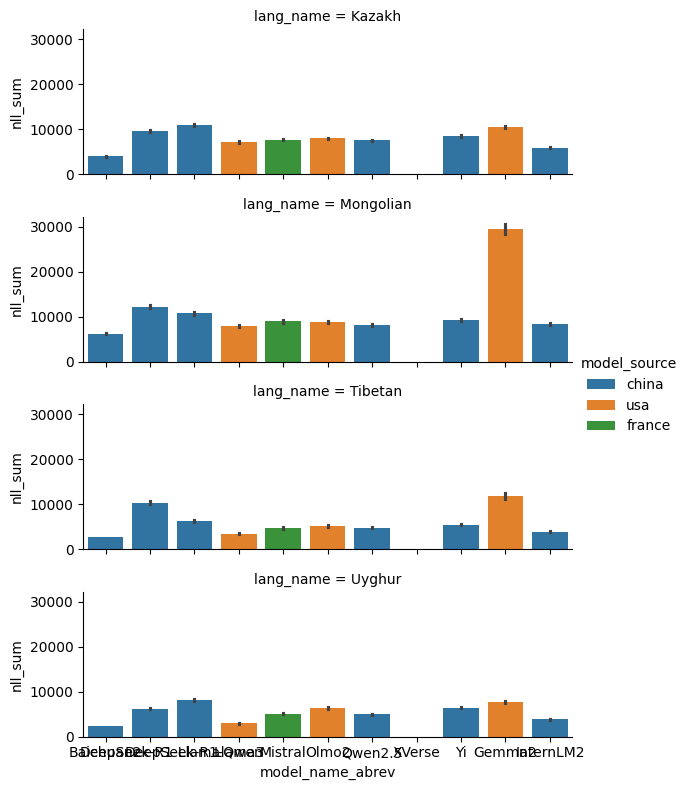

In [14]:
## nll
g = sns.catplot(kind='bar', data=mc2, row='lang_name', x='model_name_abrev', y='nll_sum', hue='model_source', height=2, aspect=3)

In [ ]:
## perplexity


## Floresp

In [2]:
df = pd.read_csv("./floresp_nll_output_v2.csv")

In [ ]:
df.head()

,index,n_toks,nll_sum,ppl,lang_code,lang_name,lang_category,model_name,n_chars,model_name_abrev,model_path_hf,model_source,ip_base_eng_Latn,ip_base_cmn_Hans
0,0,422,576.742065,3.935090,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Qwen2.5-7B,302,Qwen2.5,Qwen/Qwen2.5-7B,china,0.233585,0.236439
1,1,376,523.121155,4.034934,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Qwen2.5-7B,283,Qwen2.5,Qwen/Qwen2.5-7B,china,0.216030,0.238716
2,2,224,357.670319,4.972401,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Qwen2.5-7B,167,Qwen2.5,Qwen/Qwen2.5-7B,china,0.302703,0.341657
3,3,115,233.926453,7.783347,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Qwen2.5-7B,85,Qwen2.5,Qwen/Qwen2.5-7B,china,0.323047,0.413464
4,4,135,178.620682,3.792366,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Qwen2.5-7B,100,Qwen2.5,Qwen/Qwen2.5-7B,china,0.315106,0.341188


In [4]:
df['model_source'].unique()

array(['china', 'usa', 'france', 'singapore'], dtype=object)

In [5]:
mapping = {"china": "china", "usa": "us/europe", "france": "us/europe", "singapore": "singapore"}
df['model_source_category'] = df['model_source'].apply(lambda t: mapping[t])

In [22]:
df.head()

,index,n_toks,nll_sum,ppl,lang_code,lang_name,lang_category,model_name,n_chars,model_name_abrev,model_path_hf,model_source,ip_base_eng_Latn,ip_base_cmn_Hans,model_source_category
0,0,422,576.742065,3.935090,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Qwen2.5-7B,302,Qwen2.5,Qwen/Qwen2.5-7B,china,0.233585,0.236439,china
1,1,376,523.121155,4.034934,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Qwen2.5-7B,283,Qwen2.5,Qwen/Qwen2.5-7B,china,0.216030,0.238716,china
2,2,224,357.670319,4.972401,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Qwen2.5-7B,167,Qwen2.5,Qwen/Qwen2.5-7B,china,0.302703,0.341657,china
3,3,115,233.926453,7.783347,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Qwen2.5-7B,85,Qwen2.5,Qwen/Qwen2.5-7B,china,0.323047,0.413464,china
4,4,135,178.620682,3.792366,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Qwen2.5-7B,100,Qwen2.5,Qwen/Qwen2.5-7B,china,0.315106,0.341188,china


In [26]:
df_grouped = df.groupby(["lang_code", "lang_name", "lang_category", "model_name", "model_name_abrev", "model_source_category"])['ip_base_cmn_Hans'].mean().reset_index(name='mean_ip(base=chinese)')



In [27]:
df_grouped

,lang_code,lang_name,lang_category,model_name,model_name_abrev,model_source_category,mean_ip(base=chinese)
0,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Baichuan2-7B-Base,Baichuan2,china,0.459989
1,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,DeepSeek-R1-Distill-Llama-8B,DeepSeek-R1-Llama,china,0.265219
2,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,DeepSeek-R1-Distill-Qwen-7B,DeepSeek-R1-Qwen,china,0.377704
3,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Meta-Llama-3-8B,Llama3,us/europe,0.508596
4,bod_Tibt,Lhasa Tibetan,Chinese Ethnic Minorities,Mistral-7B-v0.3,Mistral,us/europe,0.448331
...,...,...,...,...,...,...,...
204,zsm_Latn,Standard Malay,Southeast Asian,Qwen2.5-7B,Qwen2.5,china,0.710863
205,zsm_Latn,Standard Malay,Southeast Asian,Yi-6B,Yi,china,0.637350
206,zsm_Latn,Standard Malay,Southeast Asian,gemma-2-9b,Gemma2,us/europe,0.915231
207,zsm_Latn,Standard Malay,Southeast Asian,gemma2-9b-cpt-sea-lionv3-base,SeaLion,singapore,0.873526


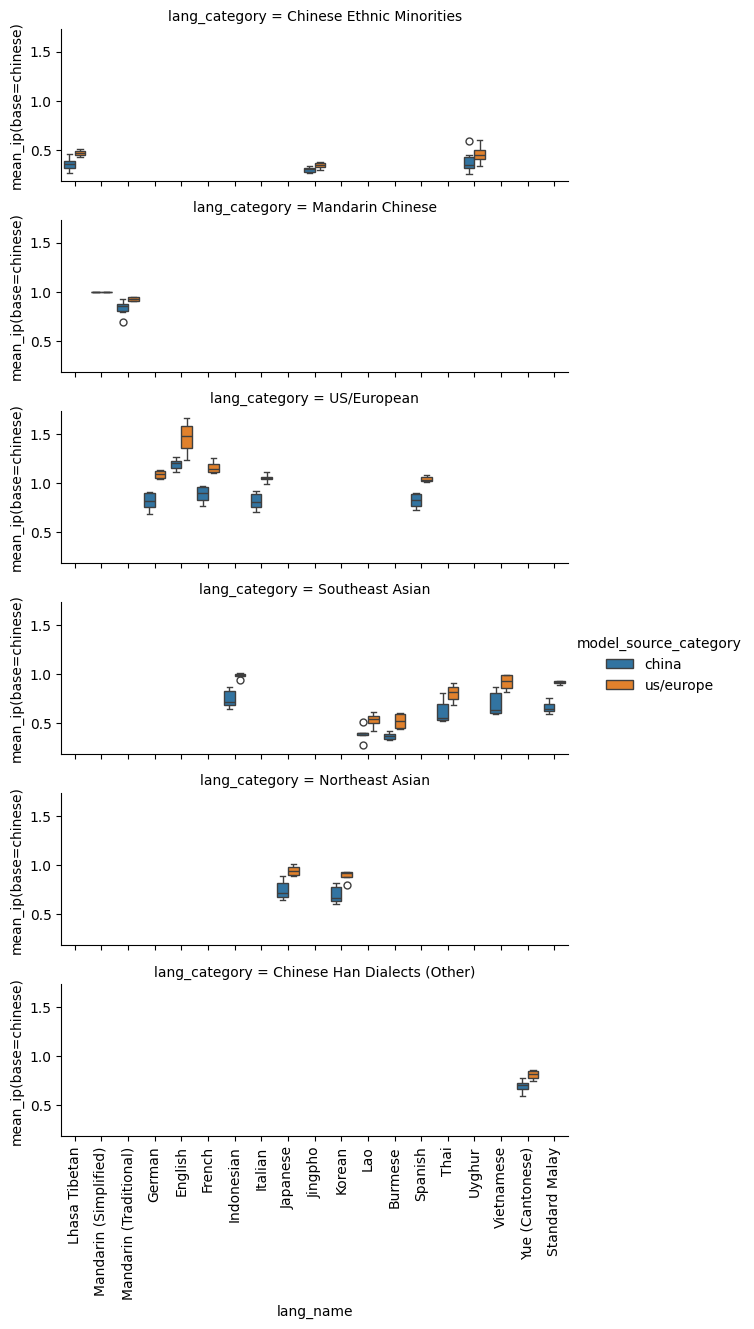

In [28]:
g = sns.catplot(kind='box', 
row = 'lang_category',
data=df_grouped[df_grouped['model_source_category'].isin(["china", "us/europe"])], 
x="lang_name", y="mean_ip(base=chinese)", hue="model_source_category",
height=2,
aspect=3)
g.tick_params(axis='x', labelrotation=90)

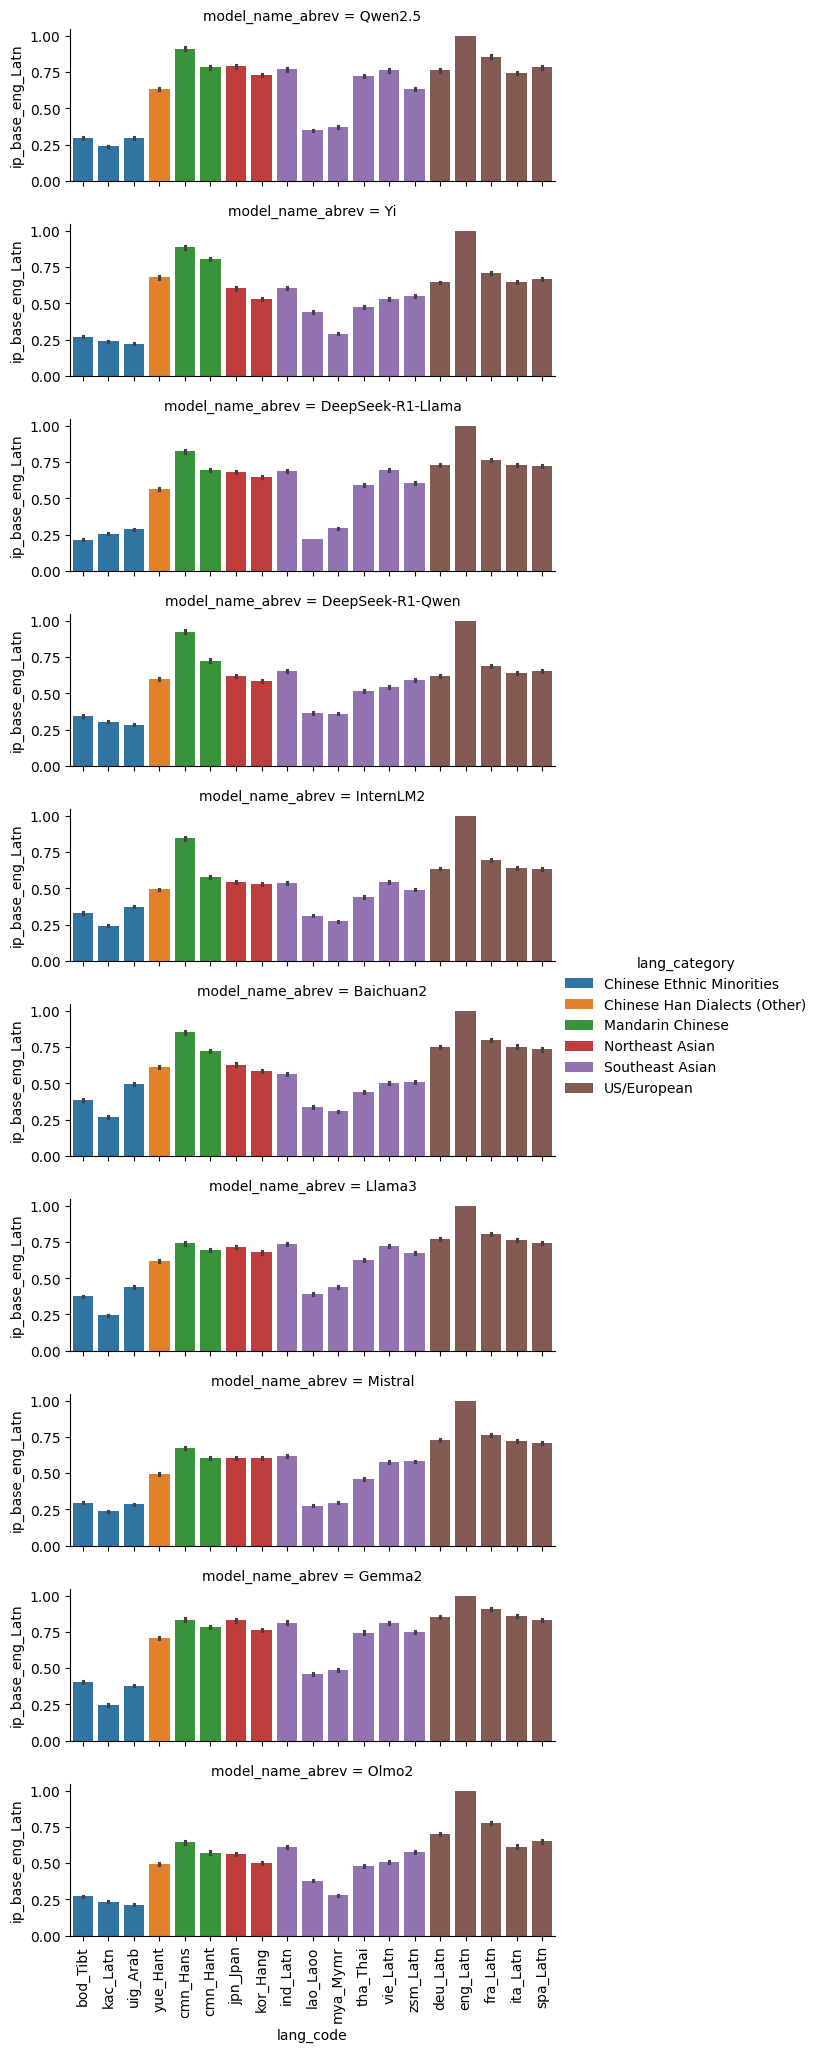

In [9]:
g = sns.catplot(data=df, kind='bar', row='model_name_abrev', x='lang_code', y='ip_base_eng_Latn', hue='lang_category', height=2, aspect=3)
g.tick_params(axis='x', rotation=90)

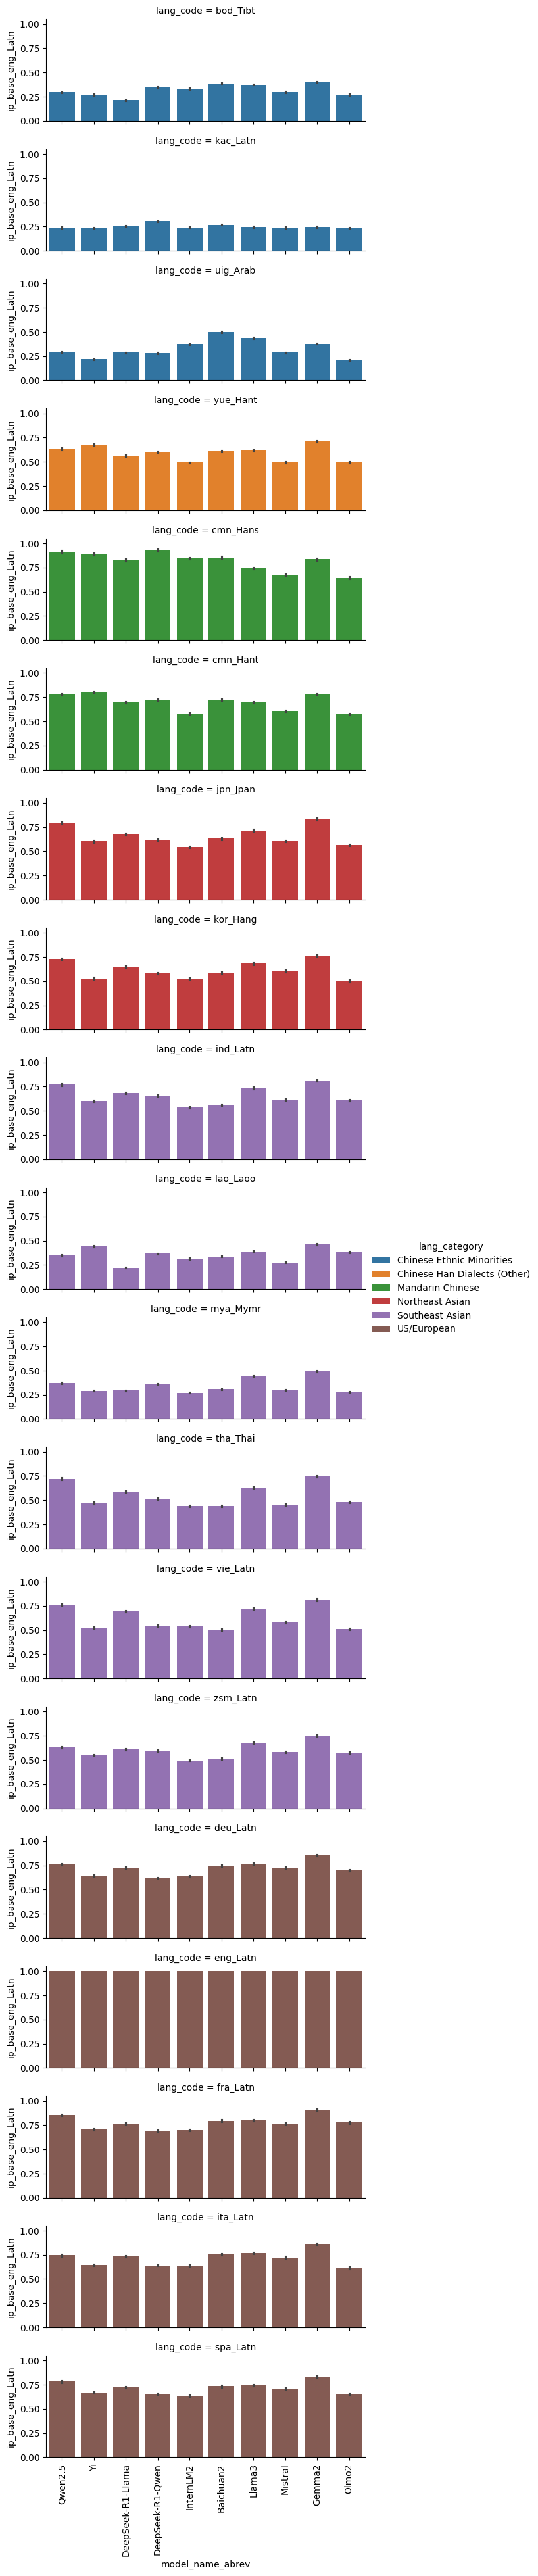

In [10]:
g = sns.catplot(data=df, kind='bar', row='lang_code', x='model_name_abrev', y='ip_base_eng_Latn', hue='lang_category', height=2, aspect=3)
g.tick_params(axis='x', rotation=90)